## Problem Statement:
   The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

#### Attribute Information

**Input variables (based on physicochemical tests):**
 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol
 
**Output variable (based on sensory data):**
 - quality (score between 0 and 10)

In [438]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [439]:
#Importing dataset
data= pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [441]:
#checking presence of null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [442]:
#seeing if there is any duplicate observations
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True,drop=True)

In [443]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [444]:
#statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


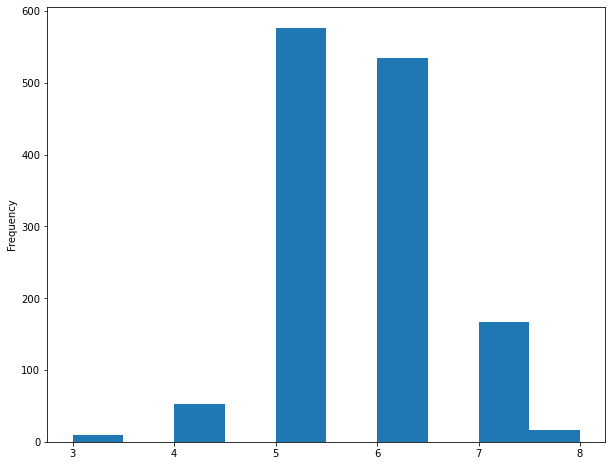

In [445]:
#checking is there any imbalance in the classes
print(data['quality'].value_counts())
plt.figure(figsize=(10,8),facecolor='white')
data.quality.plot(kind='hist')
plt.show()

There is imbalance in the dataset. And we will convert the multinomial classification to binomial 

In [446]:
#converting multinomial classes into binomial
encoding= pd.DataFrame(data['quality']>=7)
for i in range(len(encoding['quality'])):
    if encoding['quality'][i]==True:
        data['quality'][i]=1
    else:
        data['quality'][i]=0


0    1175
1     184
Name: quality, dtype: int64


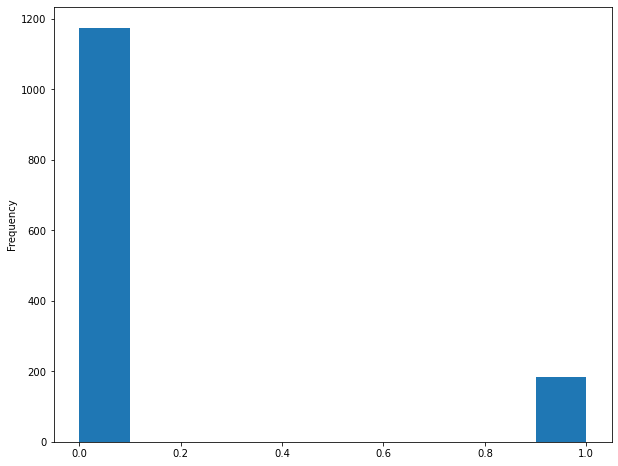

In [447]:
#checking imbalance in classes after encoding 
print(data['quality'].value_counts())
plt.figure(figsize=(10,8),facecolor='white')
data.quality.plot(kind='hist')
plt.show()

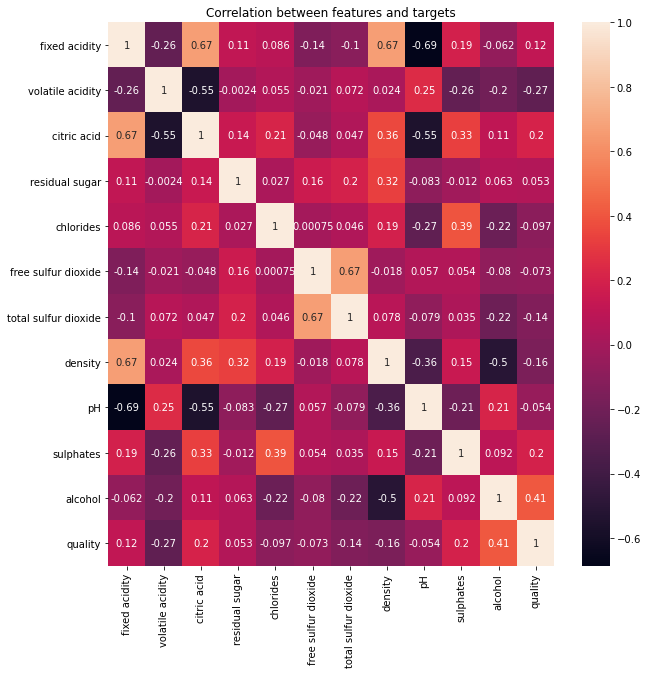

In [448]:
#correlation between features and target
plt.figure(figsize=(10,10),facecolor='white')
corr_matrix= data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation between features and targets')
plt.show()

In [449]:
corr_matrix.quality.sort_values()

volatile acidity       -0.267344
density                -0.158052
total sulfur dioxide   -0.135877
chlorides              -0.096806
free sulfur dioxide    -0.072771
pH                     -0.054131
residual sugar          0.052811
fixed acidity           0.116120
sulphates               0.201551
citric acid             0.203561
alcohol                 0.409926
quality                 1.000000
Name: quality, dtype: float64

As we can see there are weak correlation between some features and the target. Also, multicollinearity between the features are not high. for now lets keep all the features and build our model. In case if our model didn't performe well then we will further process this data by removing some features based on correlation.

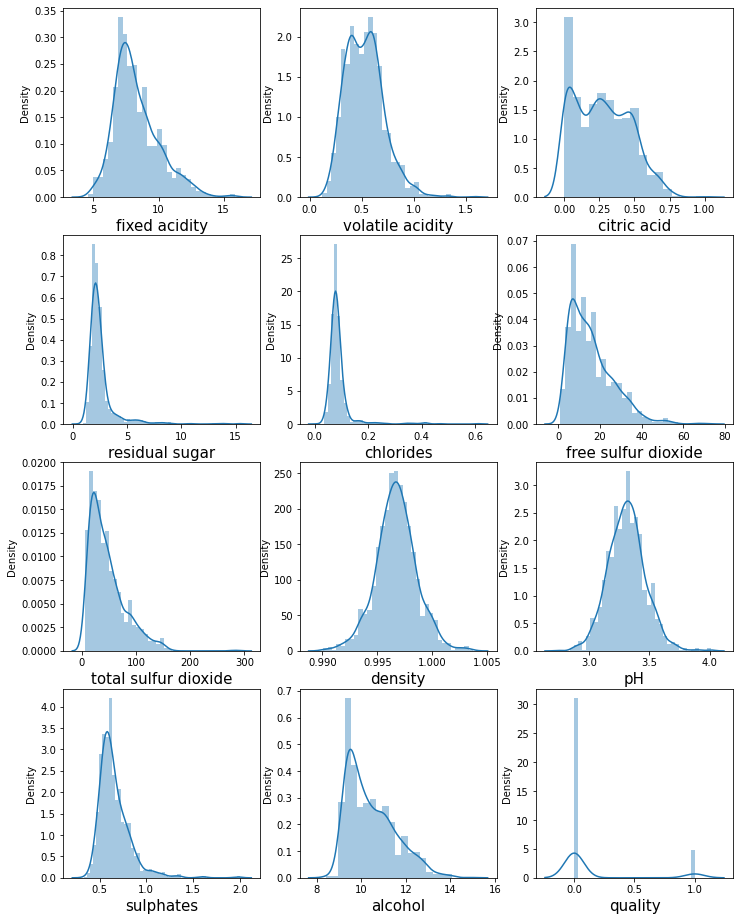

In [450]:
#visualization of dataset to see if data is normally distributed
plt.figure(figsize=(12,16),facecolor='white')
plotnumber=1

for column in data.columns:
    plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
    
plt.show()

In [451]:
data.skew().sort_values()

density                 0.044778
pH                      0.232032
citric acid             0.312726
volatile acidity        0.729279
alcohol                 0.859841
fixed acidity           0.941041
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
quality                 2.133662
sulphates               2.406505
residual sugar          4.548153
chlorides               5.502487
dtype: float64

some of the features are skewed where skew is more than 0.5. Lets rectifiy it using power transform technique

In [452]:
#lets split the features and target
x= data.drop(columns='quality')
y= data.quality

In [453]:
#power transform method
from sklearn.preprocessing import power_transform
x_normal= power_transform(x)
x= pd.DataFrame(x_normal,columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.439412,0.978091,-1.530544,-0.602600,-0.166676,-0.269573,-0.128948,0.587781,1.277041,-0.582775,-1.068157
1,-0.161475,1.720040,-1.530544,0.560720,0.778512,0.992495,0.841796,0.054350,-0.695907,0.400130,-0.499290
2,-0.161475,1.242047,-1.256962,0.153076,0.557116,0.192377,0.530012,0.161294,-0.296058,0.188379,-0.499290
3,1.529010,-1.551503,1.389613,-0.602600,-0.219369,0.384096,0.681966,0.694083,-0.967619,-0.391438,-0.499290
4,-0.439412,0.791661,-1.530544,-0.844564,-0.219369,-0.023152,0.100926,0.587781,1.277041,-0.582775,-1.068157
...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.903672,0.596149,-0.996743,-0.602600,-0.616834,1.176074,0.028175,-0.100946,0.727244,1.169880,-0.916248
1355,-1.436385,0.494776,-0.996743,-0.384706,0.477791,1.395040,0.236575,-0.968055,0.912498,-0.391438,0.286561
1356,-1.733557,0.230050,-0.871292,-0.009276,-1.001198,1.724577,0.447853,-0.849072,1.337040,0.878488,0.875408
1357,-1.733557,0.719444,-0.748774,-0.384706,-0.219369,1.395040,0.236575,-0.660104,1.633860,0.593171,-0.021928


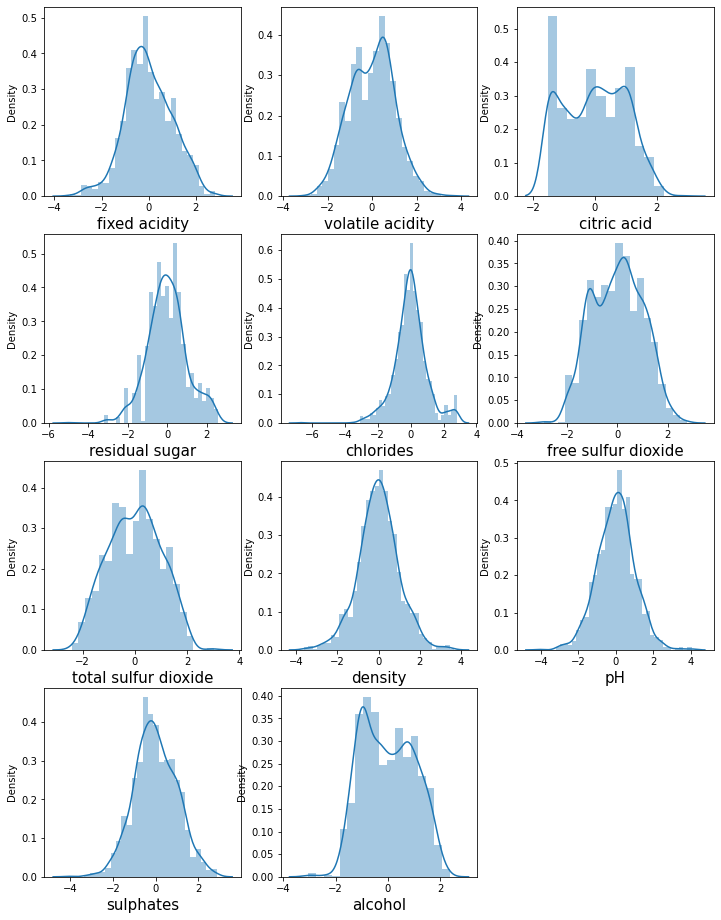

In [454]:
#visualization of dataset again to see now data is normally distributed
plt.figure(figsize=(12,16),facecolor='white')
plotnumber=1

for column in x.columns:
    plt.subplot(4,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [455]:
x.skew().sort_values()

chlorides              -0.061923
free sulfur dioxide    -0.009899
pH                     -0.005007
total sulfur dioxide   -0.003897
density                -0.002812
residual sugar         -0.001715
fixed acidity           0.001884
volatile acidity        0.008311
sulphates               0.014637
citric acid             0.016563
alcohol                 0.116742
dtype: float64

In [456]:
#lets see if there is any feature with skew between 0.25 and -0.25
np.abs(x.skew()<0.25)

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
dtype: bool

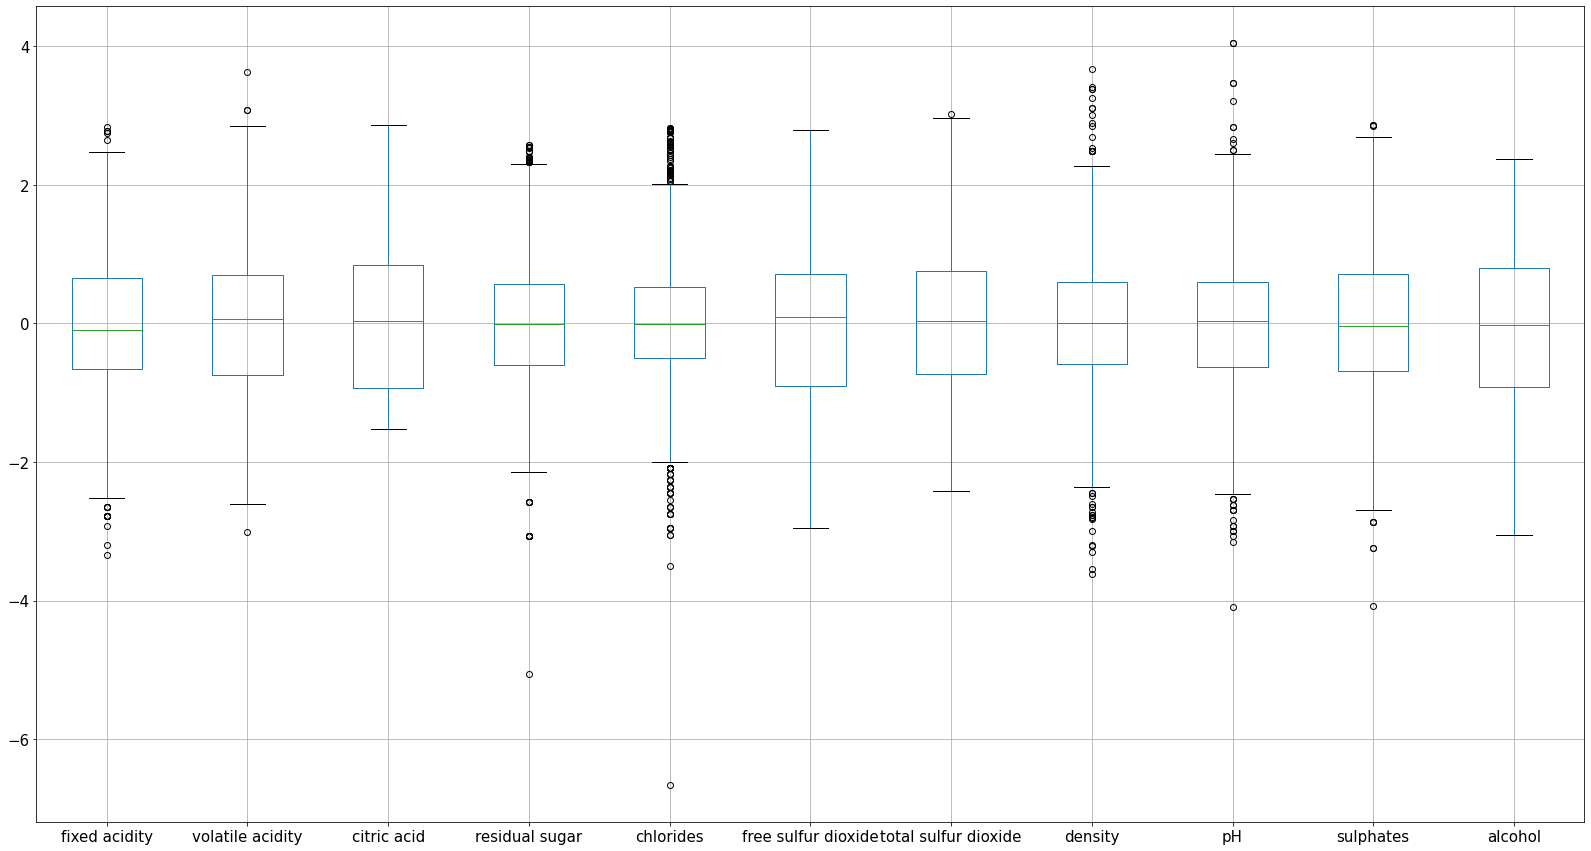

In [457]:
#lets visualize and see if theres any outliers
plt.figure(figsize=(20,15),facecolor='white')
x.boxplot(fontsize=15)
plt.subplots_adjust(right=1.2)
plt.show()

There are outliers in some features like chlorides, density, ph etc. lets remove these outliers using zscore.

In [458]:
#neglecting outliers
from scipy.stats import zscore
z_score= zscore(x)
abs_zscore= np.abs(z_score)
filter_outliers= (abs_zscore<3).all(axis=1)

x= x[filter_outliers]
new_data=x.join(y,how='inner')

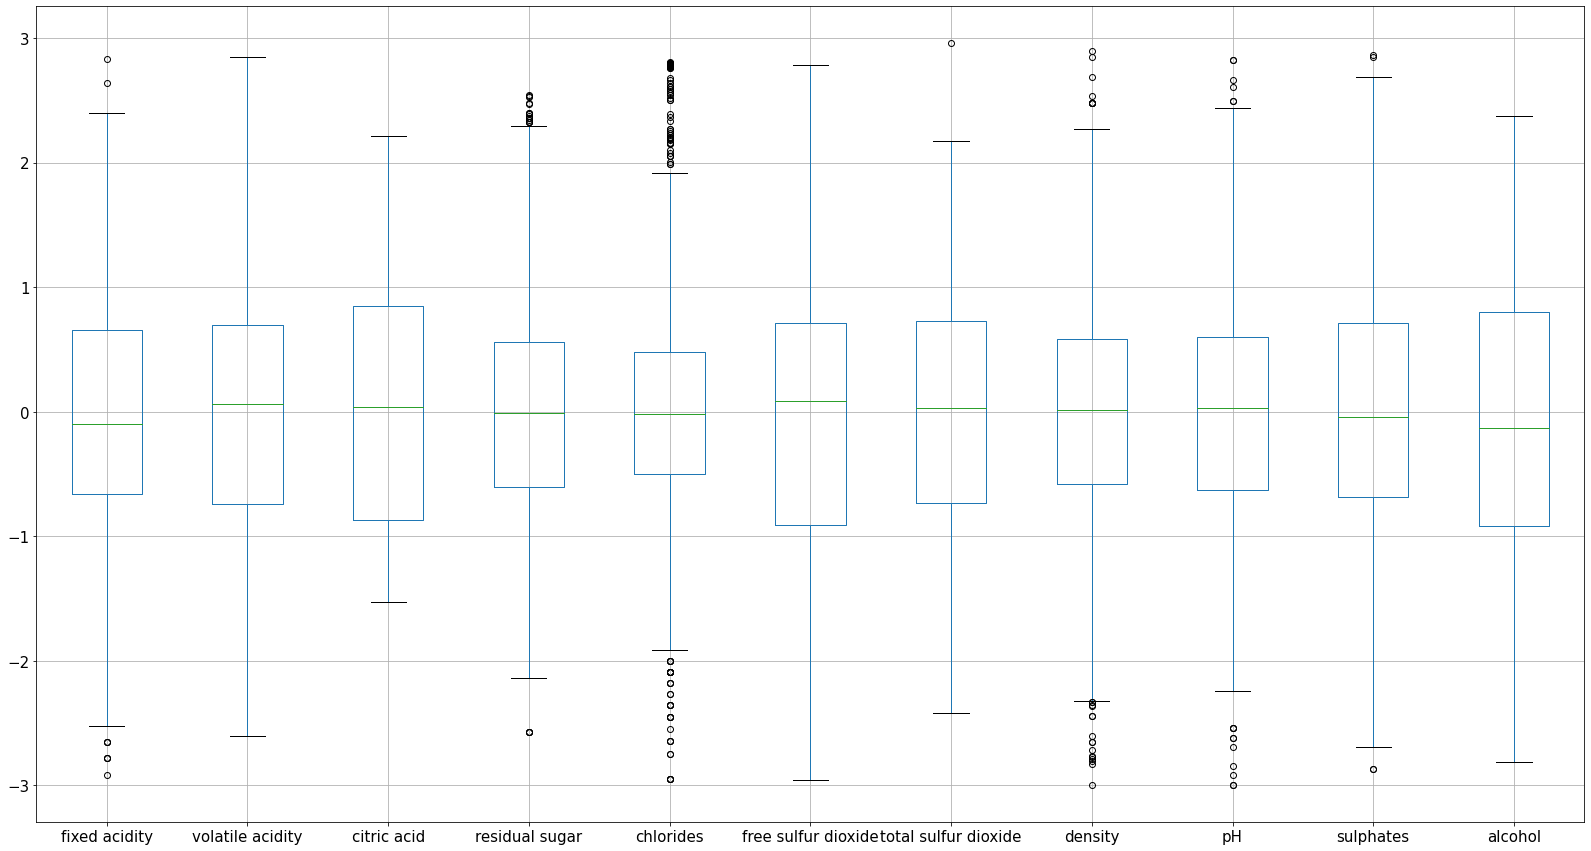

In [459]:
#visualize the data with removed outliers
plt.figure(figsize=(20,15),facecolor='white')
x.boxplot(fontsize=15)
plt.subplots_adjust(right=1.2)
plt.show()

There are some outliers in some features but they are close to the whikes of the boxplot. so it may also be an important observation. lets keep them in the dataset.

In [460]:
#model creation
#spliting the preprocessed data
x=new_data.drop(columns='quality')
y= new_data.quality

#importing necessary library for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [461]:
#finding the best random state
maxacc=0 
maxrs=0 
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=i)
    rd= RandomForestClassifier()
    rd.fit(x_train,y_train)
    y_pred= rd.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc> maxacc:
        maxacc= acc
        maxrs=i
print('Best accuracy:',maxacc, "  Best Random_state",maxrs)

Best accuracy: 0.9214501510574018   Best Random_state 109


In [465]:
#creating train_test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=109)

In [477]:
#imbalance classes
#Oversampling the training data using smote 
from imblearn.over_sampling import SMOTE
smt= SMOTE(0.75)
x_train,y_train= smt.fit_resample(x_train,y_train)

In [483]:
#model creation (Logical Regression)
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
y_pred= LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.8549848942598187
Confusion Matrix
 [[254  40]
 [  8  29]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       294
           1       0.42      0.78      0.55        37

    accuracy                           0.85       331
   macro avg       0.69      0.82      0.73       331
weighted avg       0.91      0.85      0.87       331



In [479]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.9033232628398792
Confusion Matrix
 [[275  19]
 [ 13  24]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       294
           1       0.56      0.65      0.60        37

    accuracy                           0.90       331
   macro avg       0.76      0.79      0.77       331
weighted avg       0.91      0.90      0.91       331



In [480]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.8610271903323263
Confusion Matrix
 [[265  29]
 [ 17  20]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       294
           1       0.41      0.54      0.47        37

    accuracy                           0.86       331
   macro avg       0.67      0.72      0.69       331
weighted avg       0.88      0.86      0.87       331



In [481]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.8731117824773413
Confusion Matrix
 [[265  29]
 [ 13  24]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       294
           1       0.45      0.65      0.53        37

    accuracy                           0.87       331
   macro avg       0.70      0.78      0.73       331
weighted avg       0.90      0.87      0.88       331



In [482]:
#support vector classifier
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.8851963746223565
Confusion Matrix
 [[265  29]
 [  9  28]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       294
           1       0.49      0.76      0.60        37

    accuracy                           0.89       331
   macro avg       0.73      0.83      0.76       331
weighted avg       0.91      0.89      0.90       331



<Figure size 720x720 with 0 Axes>

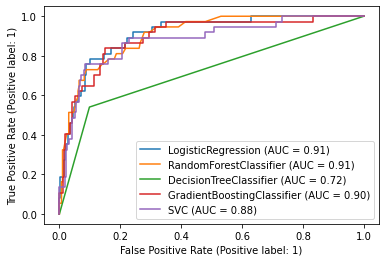

In [487]:
#plotting roc and auc curve to decide which model is good
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,10),facecolor='white')
chart= plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=chart.ax_)
plot_roc_curve(dt,x_test,y_test,ax=chart.ax_)
plot_roc_curve(gb,x_test,y_test,ax=chart.ax_)
plot_roc_curve(svc,x_test,y_test,ax=chart.ax_)
plt.show()

Since both logical regression and randomforest model gives a value of 0.91 auc. Adding to this RandomForest gives accuracy of 90%. Hence, RandomForest model is choosen for deployment.

In [504]:
#hyperparameter tunning for more accuracy of the model
from sklearn.model_selection import GridSearchCV
param= {'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[1]}
grp= GridSearchCV(rf,param_grid=param)
grp.fit(x_train,y_train)
print(grp.best_params_)

#model
rf= grp.best_estimator_ 
rf.fit(x_train,y_train)

#predict
y_pred= rf.predict(x_test)

#accuracy score
accuracy_score(y_test,y_pred)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 15}


0.9033232628398792

Since the model is running in local system. we don't have that much luxury for more range of parameter. 

**Red Wine Quality Prediction Model gives 90% accuracy**